# MULTIPLE LINEAR REGRESSION

In [300]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [301]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


#### Splitting the data

In [302]:
x = np.asarray(df.values.tolist()) 
y = np.asarray(df['Profit'].values.tolist()) 

In [303]:
df.iloc[:,3].value_counts()


New York      17
California    17
Florida       16
Name: State, dtype: int64

### Encoding data

In [304]:
df.replace(to_replace=["California","New York", "Florida"], value=[1,2,3])

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,1,191792.06
2,153441.51,101145.55,407934.54,3,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,3,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,1,156122.51
7,130298.13,145530.06,323876.68,3,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,1,149759.96


In [305]:
# Performing One Hot Encoding for the categorical value

df["California"] = df.iloc[:, 3]
df["New York"] = df.iloc[:,3]
df["Florida"] = df.iloc[:,3]

In [306]:
df.loc[df["California"]!="California", "California"] = 0
df.loc[df["California"]=="California", "California"] = 1

df.loc[df["New York"]!="New York", "New York"] = 0
df.loc[df["New York"]=="New York", "New York"] = 1

df.loc[df["Florida"]!="Florida", "Florida"] = 0
df.loc[df["Florida"]=="Florida", "Florida"] = 1

In [307]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,California,New York,Florida
0,165349.20,136897.80,471784.10,New York,192261.83,0,1,0
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,0,1
3,144372.41,118671.85,383199.62,New York,182901.99,0,1,0
4,142107.34,91391.77,366168.42,Florida,166187.94,0,0,1


In [308]:
df.drop(["State","Florida"], axis = 1, inplace = True)

In [309]:
x = np.asarray(df.values.tolist())

#### Training and Testing Data

In [310]:
# from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#### Training MLR model on Training Set

In [311]:
# from sklearn.linear_model import LinearRegression

# lr = LinearRegression()
# lr.fit(x_train,y_train)

In [312]:
# y_pred = lr.predict(x_test)
# np.set_printoptions(precision=2)

In [313]:
# print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

In [314]:
# x

#### MULTIPLE LINEAR REGRESSION FROM SCRATCH

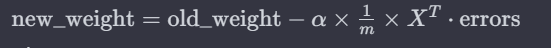

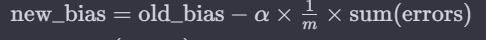

In [315]:
y.shape,x.shape


((50,), (50, 6))

In [316]:
y = y.reshape(len(y),1)
y

array([[192261.83],
       [191792.06],
       [191050.39],
       [182901.99],
       [166187.94],
       [156991.12],
       [156122.51],
       [155752.6 ],
       [152211.77],
       [149759.96],
       [146121.95],
       [144259.4 ],
       [141585.52],
       [134307.35],
       [132602.65],
       [129917.04],
       [126992.93],
       [125370.37],
       [124266.9 ],
       [122776.86],
       [118474.03],
       [111313.02],
       [110352.25],
       [108733.99],
       [108552.04],
       [107404.34],
       [105733.54],
       [105008.31],
       [103282.38],
       [101004.64],
       [ 99937.59],
       [ 97483.56],
       [ 97427.84],
       [ 96778.92],
       [ 96712.8 ],
       [ 96479.51],
       [ 90708.19],
       [ 89949.14],
       [ 81229.06],
       [ 81005.76],
       [ 78239.91],
       [ 77798.83],
       [ 71498.49],
       [ 69758.98],
       [ 65200.33],
       [ 64926.08],
       [ 49490.75],
       [ 42559.73],
       [ 35673.41],
       [ 14681.4 ]])

In [317]:
# Feature Scaling for Independent Variables
for i in range(x.shape[1]-2):
    x[:, i] = (x[:, i].astype(float) - np.mean(x[:, i].astype(float))) / np.std(x[:, i].astype(float))


In [318]:
y = (y - int(np.mean(y)))/np.std(y)

In [319]:
independent_var = pd.DataFrame(x)

In [320]:
independent_var

,0,1,2,3,4,5
0,2.016411,0.560753,2.153943,2.011203,0.0,1.0
1,1.955860,1.082807,1.923600,1.999430,1.0,0.0
2,1.754364,-0.728257,1.626528,1.980842,0.0,0.0
3,1.554784,-0.096365,1.422210,1.776627,0.0,1.0
4,1.504937,-1.079919,1.281528,1.357740,0.0,0.0
5,1.279800,-0.776239,1.254210,1.127250,0.0,1.0
6,1.340066,0.932147,-0.688150,1.105481,1.0,0.0
7,1.245057,0.871980,0.932186,1.096210,0.0,0.0
8,1.030369,0.986952,0.830887,1.007470,0.0,1.0
9,1.091819,-0.456640,0.776107,0.946022,1.0,0.0


In [321]:
import numpy as np

class MultipleLinearRegressionScratch:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Add a column of ones to X for the bias term
        X = np.hstack((np.ones((X.shape[0], 1)), X))

        # Initialize weights and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        # Gradient Descent
        for _ in range(self.num_iterations):
            predictions = np.dot(X, self.weights) + self.bias
            errors = predictions - y

            # Update weights and bias using gradient descent
            self.weights -= self.learning_rate * (1 / len(y)) * np.dot(X.T, errors)
            self.bias -= self.learning_rate * (1 / len(y)) * np.sum(errors)

    def predict(self, X):
        # Add a column of ones to X for the bias term
        X = np.hstack((np.ones((X.shape[0], 1)), X))

        return np.dot(X, self.weights) + self.bias


x = independent_var.iloc[:, :-1].values
y = independent_var.iloc[:, -1].values

# Create and fit the model
model = MultipleLinearRegressionScratch(learning_rate=0.01, num_iterations=1000)
model.fit(x, y)

# Make predictions
predictions = model.predict(X)

# Display the results
print("Weights:", model.weights)
print("Bias:", model.bias)
print("Predictions:", predictions)

Weights: [ 0.25  0.04 -0.02 -0.09  0.02 -0.46]
Bias: 0.24609675819520585
Predictions: [-35666.57744929638 -33469.347689379094 -29747.251749238156
 -28266.114535616765 -26611.76345681173 -27009.13595250184
 -6143.5521636375115 -24266.336131192445 -23652.078169646848
 -22315.983705584487 -16342.568800008597 -18002.164062923242
 -18910.47340591596 -19491.369325312244 -19057.58809513712
 -19252.609864588067 -21024.433163559646 -22412.93919439264
 -23177.93428207146 2951.1257997027174 -24244.95463136373
 -25013.330920529304 -25033.46687512038 -25180.795926676612
 -9646.880989872083 -10592.022507534431 -9892.921129536597
 -29842.97818602681 -9483.569289906685 -8046.708347321143
 -6137.800736696457 -6546.879682702062 -2213.3458411669926
 -17561.67743503487 -18474.99467294366 -16829.735988107997
 -17915.822825908217 -15683.71051337052 -15962.332279718747
 -14546.104175069706 -15370.039239989534 -14098.998054151634
 -13049.74509676284 -3618.381114781167 -3199.7771682188704
 -1158.6456661308493 

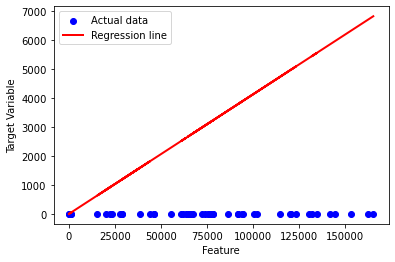

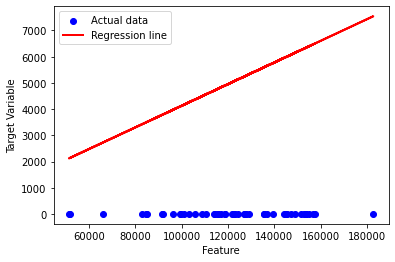

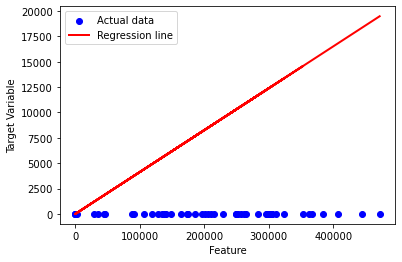

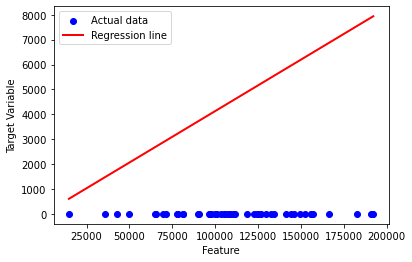

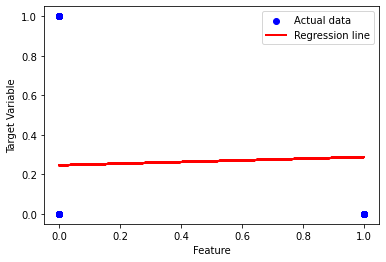

In [322]:
import matplotlib.pyplot as plt

# Function to plot regression line on a scatter plot
def plot_regression_line(x, y, weights, bias):
    plt.scatter(x, y, color='blue', marker='o', label='Actual data')
    plt.plot(x, weights[1] * x + bias, color='red', linewidth=2, label='Regression line')
    plt.xlabel('Feature')
    plt.ylabel('Target Variable')
    plt.legend()
    plt.show()

# Visualize the regression lines for each feature
for feature_index in range(X.shape[1]):
    plot_regression_line(X[:, feature_index], y, model.weights, model.bias)
